# 📉 Google Stock Prediction usnig LSTM 📈



<div class="rounded-border">
    Welcome to this notebook where we'll dive into predicting Google stock prices using LSTM.</br>
    In this project, we'll leverage the power of deep learning to forecast stock prices based on historical data.</br></br>
</div>

</body>
</html>


# <span style="color: black;">About Project</span>

<span style="color: black;">GOOGL, or Google’s stock, is a favored option among investors thanks to the company's excellent financial results and its dominant position in the tech sector. Although it experiences market fluctuations, Google’s stock is viewed as a solid long-term investment based on its financial health and industry standing. The Google Stock Price dataset features historical pricing data from <span style="color: red;font-weight: bold;">June 14, 2016</span>, to <span style="color: red;font-weight: bold;">November 20, 2024</span>. This dataset consists of seven columns, each offering distinct insights into Google's stock performance.</span>

# <span style="color: black;">Tasks in this projec</span>

•Importing necessary libraries</br>
• Loading and preparing the dataset</br>
• Data preprocessing and normalization</br>
• Generating sequences for training</br>
• Constructing the LSTM model architecture</br>
• Compiling and training the model</br>
• Visualizing predictions on training data</br>
• Predicting stock prices for the next 10 days</br>

# <span style="color: black;">Importing Data</span>

In [1]:
import yahoo_fin.stock_info as si
from datetime import datetime
import pandas as pd

# Get live price data 
live_price = si.get_live_price('GOOG')
print('The current price is: ', live_price)

# Save live price to CSV
live_price_df = pd.DataFrame({'Timestamp': [datetime.now()], 'Price': [live_price]})
live_price_df.to_csv('live_price.csv', index=False)

# Get historical data for a specific stock symbol (e.g., 'AAPL')
start_date = '2016-01-01'
end_date = '2024-11-20'

historical_data = si.get_data('GOOG', start_date=start_date, end_date=end_date)

# Save historical data to CSV
historical_data.to_csv('Google.csv')

# Print the historical data
print(historical_data)

Warning - Certain functionality 
             requires requests_html, which is not installed.
             
             Install using: 
             pip install requests_html
             
             After installation, you may have to restart your Python session.


c:\Users\shara\AppData\Local\anaconda3\Lib\site-packages\yahoo_fin\stock_info.py:580: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return df.close[-1]


The current price is:  192.9600067138672
                  open        high         low       close    adjclose  \
2016-01-04   37.150002   37.202999   36.562901   37.091999   36.959202   
2016-01-05   37.322498   37.599998   36.931999   37.129002   36.996071   
2016-01-06   36.500000   37.359001   36.445999   37.181000   37.047878   
2016-01-07   36.515499   36.924999   35.952999   36.319500   36.189465   
2016-01-08   36.572498   36.661499   35.650002   35.723499   35.595604   
...                ...         ...         ...         ...         ...   
2024-11-13  182.149994  182.615005  180.119995  180.490005  180.285477   
2024-11-14  179.750000  180.445007  176.029999  177.350006  177.149033   
2024-11-15  175.639999  175.880005  172.744995  173.889999  173.692947   
2024-11-18  174.955002  176.910004  174.419998  176.800003  176.599655   
2024-11-19  175.235001  180.169998  175.115997  179.580002  179.376495   

              volume ticker  
2016-01-04  65456000   GOOG  
2016-01-05

In [2]:
# Load the data (First part of the code)
df = pd.read_csv('Google.csv')  # Load the dataset
features = ['open', 'high', 'low', 'close', 'volume']  # Define selected features
df = df[features]  # Select desired columns

In [3]:
df

,open,high,low,close,volume
0,37.150002,37.202999,36.562901,37.091999,65456000
1,37.322498,37.599998,36.931999,37.129002,39014000
2,36.500000,37.359001,36.445999,37.181000,38940000
3,36.515499,36.924999,35.952999,36.319500,59274000
4,36.572498,36.661499,35.650002,35.723499,49018000
...,...,...,...,...,...
2231,182.149994,182.615005,180.119995,180.490005,13969700
2232,179.750000,180.445007,176.029999,177.350006,17925800
2233,175.639999,175.880005,172.744995,173.889999,21708900
2234,174.955002,176.910004,174.419998,176.800003,18725400


### This code checks for missing values and duplicate rows in the dataset, then generates and displays summary tables with the results.

In [4]:
import pandas as pd
from tabulate import tabulate

# Load the dataset (Replace 'Google_renamed.csv' with your file)
df = pd.read_csv('Google_renamed.csv')

# Check for missing data
missing_data = df.isnull().sum()

# Check for duplicate data
duplicate_data = df.duplicated().sum()

# Create a summary table of overall results
results = pd.DataFrame({
    'Metric': ['Missing Values', 'Duplicate Rows'],
    'Count': [missing_data.sum(), duplicate_data]
})

# Create a table of missing values per column
missing_per_column = pd.DataFrame({
    'Column': df.columns,
    'Missing Values': df.isnull().sum()
})

# Display tables with borders
print("Summary Table:")
print(tabulate(results, headers='keys', tablefmt='grid'))

print("\nMissing Values per Column:")
print(tabulate(missing_per_column, headers='keys', tablefmt='grid'))


Summary Table:
+----+----------------+---------+
|    | Metric         |   Count |
+====+================+=========+
|  0 | Missing Values |       0 |
+----+----------------+---------+
|  1 | Duplicate Rows |       0 |
+----+----------------+---------+

Missing Values per Column:
+----------+----------+------------------+
|          | Column   |   Missing Values |
+==========+==========+==================+
| date     | date     |                0 |
+----------+----------+------------------+
| open     | open     |                0 |
+----------+----------+------------------+
| high     | high     |                0 |
+----------+----------+------------------+
| low      | low      |                0 |
+----------+----------+------------------+
| close    | close    |                0 |
+----------+----------+------------------+
| adjclose | adjclose |                0 |
+----------+----------+------------------+
| volume   | volume   |                0 |
+----------+----------+--------

### This code prepares the stock price data for plotting and creates an interactive line chart using Plotly Express, showing the open, high, low, and close prices over time.

In [5]:
import plotly.express as px
import pandas as pd

# Assumption: df is a DataFrame containing the following columns:
# 'date', 'open', 'high', 'low', 'close'

# Prepare the data for plotting
melted_data = df.melt(id_vars='date', value_vars=['open', 'high', 'low', 'close'],
                      var_name='Price Type', value_name='Price')

# Create an interactive chart with Plotly Express
fig = px.line(melted_data, x='date', y='Price', color='Price Type',
              title='Stock Price Analysis',
              labels={'date': 'Date', 'Price': 'Price', 'Price Type': 'Type of Price'})

# Additional settings (optional)
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Price',
    legend_title='Price Type',
    template='plotly_white'  # Change theme to "plotly_white"
)

# Display the chart
fig.show()


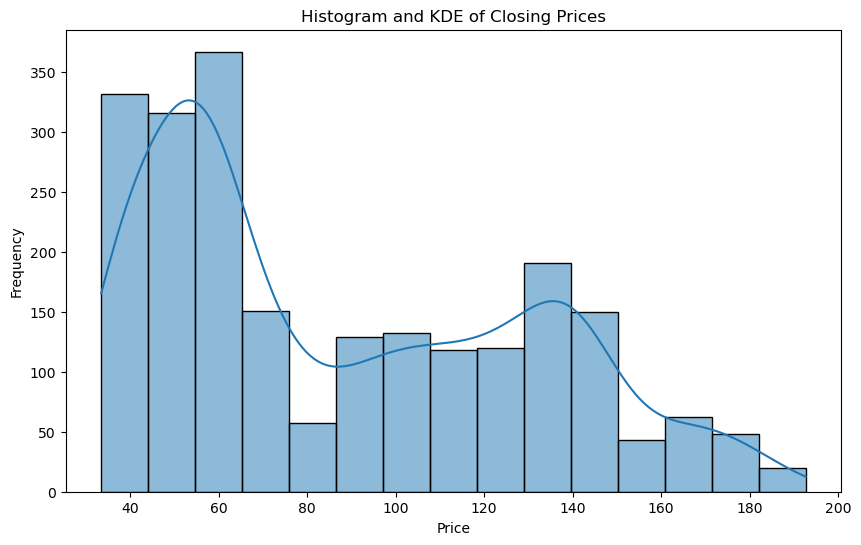

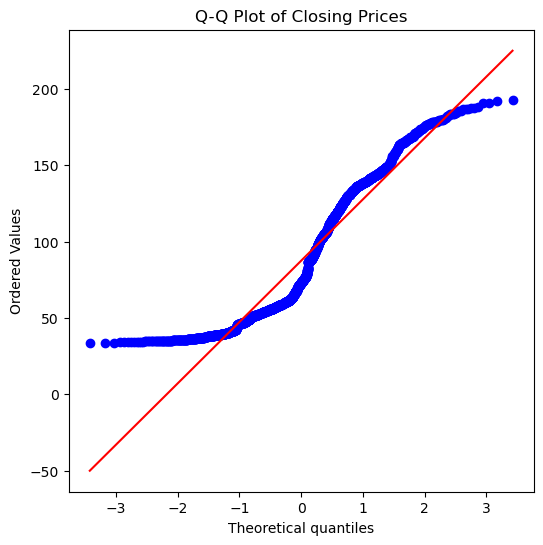

Shapiro-Wilk Test p-value: 2.264708692930577e-34
The data does not follow a normal distribution (Reject H0).
Kolmogorov-Smirnov Test p-value: 9.39278454029455e-51
The data does not follow a normal distribution (Reject H0).


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
df = pd.read_csv('Google_renamed.csv')

# Assumption: You want to check if the closing prices ('close') are normally distributed
data = df['close'].dropna()  # Remove missing values

# 1. Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data, kde=True)
plt.title('Histogram and KDE of Closing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# 2. Q-Q Plot
plt.figure(figsize=(6, 6))
stats.probplot(data, dist="norm", plot=plt)
plt.title('Q-Q Plot of Closing Prices')
plt.show()

# 3. Shapiro-Wilk test for normality
stat, p_value = stats.shapiro(data)
print(f"Shapiro-Wilk Test p-value: {p_value}")
if p_value > 0.05:
    print("The data follows a normal distribution (Fail to reject H0).")
else:
    print("The data does not follow a normal distribution (Reject H0).")

# 4. Kolmogorov-Smirnov test (if needed)
stat_ks, p_value_ks = stats.kstest(data, 'norm', args=(np.mean(data), np.std(data)))
print(f"Kolmogorov-Smirnov Test p-value: {p_value_ks}")
if p_value_ks > 0.05:
    print("The data follows a normal distribution (Fail to reject H0).")
else:
    print("The data does not follow a normal distribution (Reject H0).")


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Remove non-numeric columns from the DataFrame
df_numeric = df.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_numeric)  # Apply scaling


In [8]:
# Define sequence length (for LSTM model)
seq_length = 90  # Use the past 90 days to predict the next day's value


In [9]:
# Create time sequences (X and Y)
def create_sequences(data, seq_length):
    X = []
    Y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])  # Input sequence of length `seq_length`
        Y.append(data[i + seq_length])   # Target value after the sequence
    return np.array(X), np.array(Y)


In [10]:
# Generate data sequences
X, Y = create_sequences(data_scaled, seq_length)

In [11]:
# Split data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

In [12]:
from tensorflow.keras.layers import Input

# Define the LSTM model
model = Sequential([
    Input(shape=(X_train.shape[1], 1)),  # Input layer
    LSTM(units=100, return_sequences=True),  # First LSTM layer with return_sequences=True
    LSTM(units=100, return_sequences=False),  # Second LSTM layer
    Dense(units=50, activation='relu'),  # Fully connected layer with ReLU activation
    Dense(units=1)  # Output layer
])

In [13]:
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_squared_error')


Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - loss: 0.0292 - val_loss: 0.0041
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - loss: 8.7483e-04 - val_loss: 0.0018
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - loss: 4.7307e-04 - val_loss: 0.0019
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - loss: 4.6429e-04 - val_loss: 0.0015
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - loss: 4.3404e-04 - val_loss: 0.0019
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - loss: 4.1572e-04 - val_loss: 0.0013
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - loss: 3.8490e-04 - val_loss: 0.0012
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - loss: 4.4210e-04 - val_loss: 0.0013
Epoch 9/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - loss: 3.8914e-04 - val_loss: 0.0016
Epoch 10/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - loss: 3.8549e-04 - val_loss: 0.0016
Epoch 11/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 177ms/step - loss: 3.6218e-04 - val_loss: 9.4270e-04
Epoch 12/

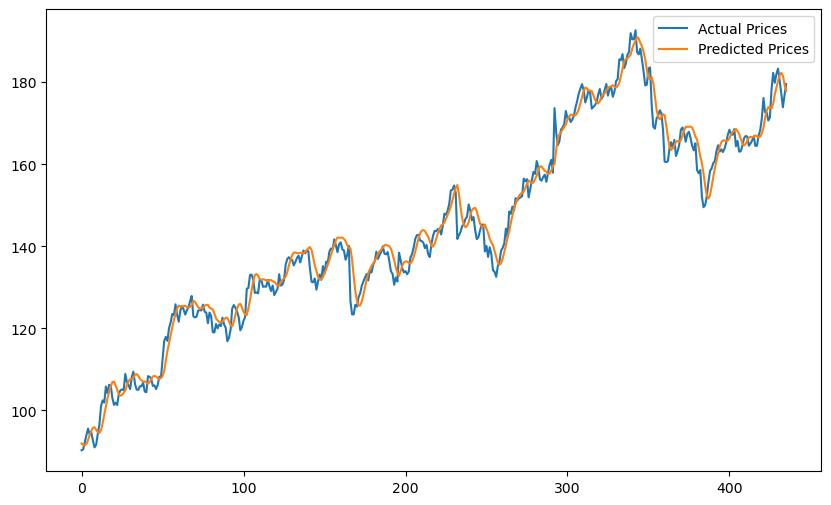

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

# Scaling the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df['close'].values.reshape(-1, 1))

# Function to create sequences
def create_sequences(data, seq_length):
    X, Y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        Y.append(data[i + seq_length])
    return np.array(X), np.array(Y)

seq_length = 60
X, Y = create_sequences(data_scaled, seq_length)

# Splitting the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# Constructing the model
model = Sequential([
    Input(shape=(X_train.shape[1], 1)),
    LSTM(100, return_sequences=True),
    LSTM(100, return_sequences=False),
    Dense(50, activation='relu'),
    Dense(1)
])

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Model checkpoint and early stopping
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the model
history = model.fit(X_train, Y_train, epochs=50, batch_size=64, validation_data=(X_test, Y_test), callbacks=[checkpoint, early_stopping])

# Predicting
predictions = model.predict(X_test)

# Inverse transforming the predictions back to the original scale
predicted_prices = scaler.inverse_transform(predictions)
Y_test_actual = scaler.inverse_transform(Y_test.reshape(-1, 1))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(Y_test_actual, label='Actual Prices')
plt.plot(predicted_prices, label='Predicted Prices')
plt.legend()
plt.show()

In [15]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(Y_test_actual, predicted_prices)
print(f"Mean Absolute Error (MAE): {mae}")


Mean Absolute Error (MAE): 2.576120026614686


In [16]:
# Predicting using the trained model
predicted_prices = model.predict(X_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [17]:
# Inverse transforming the predicted and actual values back to the original scale
predicted_prices = scaler.inverse_transform(predicted_prices)
Y_test_actual = scaler.inverse_transform(Y_test.reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


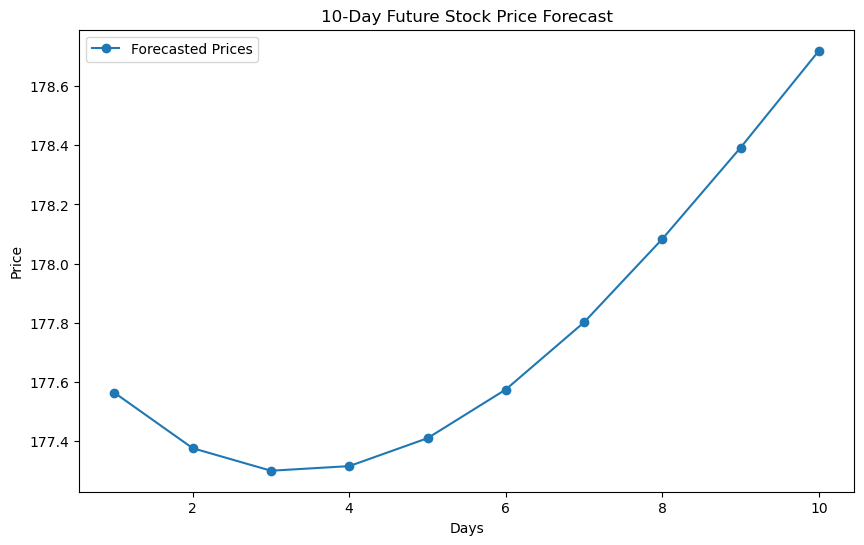

In [18]:
forecast_days = 10
last_sequence = data_scaled[-seq_length:]
forecast_sequence = np.copy(last_sequence)
future_predictions = []

for _ in range(forecast_days):
    next_pred = model.predict(forecast_sequence.reshape(1, seq_length, 1))
    future_predictions.append(next_pred[0, 0])
    forecast_sequence = np.append(forecast_sequence[1:], next_pred[0, 0])

future_predictions_original = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

plt.figure(figsize=(10, 6))
plt.plot(range(1, forecast_days + 1), future_predictions_original, marker='o', label="Forecasted Prices")
plt.title("10-Day Future Stock Price Forecast")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


In [19]:
forecast_days = 10
last_sequence = data_scaled[-seq_length:]
forecast_sequence = np.copy(last_sequence)
future_predictions = []

for _ in range(forecast_days):
    next_pred = model.predict(forecast_sequence.reshape(1, seq_length, 1))
    future_predictions.append(next_pred[0, 0])
    forecast_sequence = np.append(forecast_sequence[1:], next_pred[0, 0])

future_predictions_original = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

print("Forecasted Prices for the next 10 days:")
print(future_predictions_original)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Forecasted Prices for the next 10 days:
[[177.56348]
 [177.37599]
 [177.29982]
 [177.31537]
 [177.40971]
 [177.57434]
 [177.80153]
 [178.08331]
 [178.39212]
 [178.7194 ]]
